## 주성분 분석을 통한 비지도 차원 축소

특성 선택과 특성 추출은 데이터셋의 특성 개수를 줄인다.
특성 선택은 원본 특성을 유지한다.
특성 추출은 새로운 특성 공간으로 데이터를 변환하거나 튜영한다.

PCA는 비지도(unsupervised) 선형 변환 기법이다.
PCA는 특성 추출과 차원 축소 용도로 많이 쓰인다.
PCA는 고차원 데이터에서 분산이 가장 큰 방향을 찾고, 더 작은 차원의 부분 공간으로 이를 투영한다.
투영된 부분 공간의 직교 좌표(주성분)는 분산이 최대인 방향이다.
PCA 방향은 데이터 스케일에 매우 민감해서 특성을 표준화 해야한다.

고유벡터: 어떤 선형 변환을 취했을때, 방향은 변하지 않고 크기만 변하는 벡터 
고윳값: 선형 변환시, 고유벡터가 변한 크기

다음은 PCA 알고리즘이다.

1. 데이터셋을 표준화 한다.
2. 공분산 행렬을 구성한다.
3. 공분산 행렬의 고윳값과 고유벡터를 구한다.
4. 고윳값을 내리차순으로 정렬하여 고유벡터 순위를 매긴다.
5. 고윳값이 가장 큰 $k$개의 고유벡터를 선택한다. $k$는 새로운 특성 부분 공간의 차원
6. 최상위 $k$개의 고유벡터로 투영 행렬 W를 만든다.
7. 투영 행렬 $W$를 사용해서 $d$차원 입력 데이터셋 $X$를 새로운 $k$ 차원의 특성 부분 공간으로 반환한다.

In [1]:
# Wine 데이터셋 로그 

import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu'
                      '/ml/machine-learning-databases/wine/wine.data', header=None)

In [2]:
# Wine 데이터셋을 7:3 비율로 훈련셋과 테스트셋으로 나눈다.

from sklearn.model_selection import train_test_split

# 인덱스 1에서 인덱스 13까지 특성을 넘파일 배열로 변환하여 x에 할당
x = df_wine.iloc[:, 1:].values
# 첫번째 열의 클래스 레이블을 y에 할당
y = df_wine.iloc[:, 0].values
# train_test_split 함수를 사용하여 x와 y를 랜덤하게 훈련셋과 테스트셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.3,      # 와인 샘플의 30%가 x_test와 y_test에 할당 
    random_state=0, 
    stratify=y          # y로 하면 훈련셋과 테스트셋에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지됨
)

In [3]:
# 특성을 표준화 한다.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

공분산을 구하는 식은 다음과 같다. 

$$\sigma_{jk}={1 \over n}\sum_{i=1}^n(x_j^{(i)}-\mu_j)(x_k^{(i)}-\mu_k)$$

In [4]:
import numpy as np

# 표준화된 훈련셋으로 공분산 행렬을 구한다.
cov_mat = np.cov(x_train_std.T)
# 공분산 행렬에 대한 고윳값과 고유 벡터를 구한다.
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 

print('\n고윳값 \n%s' % eigen_vals)


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


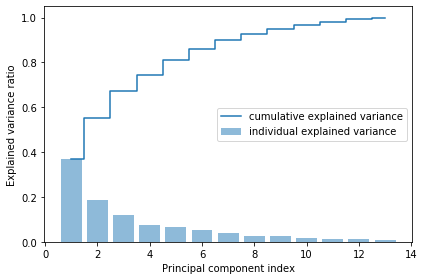

In [5]:
# 고윳값의 설명된 분산 비율을 그래프로 그려보기

# 전체 고윳값의 합
tot = sum(eigen_vals)
# 전체 고윳값의 합에서 고윳값의 비율을 구한다.
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# np.cumsum 함수는 누적 합을 계산한다.
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


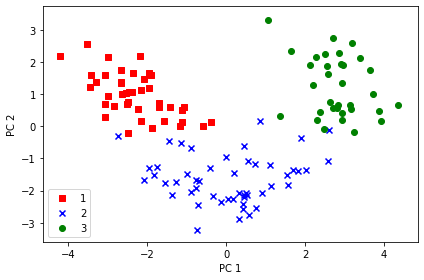

In [8]:
# [(고윳값, 고유 벡터)]를 만든다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# 고윳값의 내림차순으로 정렬한다.
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# 2개의 고유벡터를 선택해서 투영 행렬을 만든다(주성분의 개수가 2개이고 전체 60%를 커버).
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

# 훈련 데이터셋의 샘플x를 투영행렬(PCA의 부분공간) w를 투영한다.
x_train_std[0].dot(w)
# 훈련 데이터셋 전체 샘플에 투영행렬(PCA의 부분공간) w를 투영한다.
x_train_pca = x_train_std.dot(w)

# 변환된 Wine 훈련셋의 2차원 산점도를 시각화한다.

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        x_train_pca[y_train==l, 0],
        x_train_pca[y_train==l, 1],
        c=c, label=l, marker=m
    )
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()